In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../Data/final_train.csv")
df_test = pd.read_csv("../Data/final_test.csv")

In [3]:
df_train = df_train.drop(['Unnamed: 0'], axis = 1)
df_train.head()

,GarageYrBlt,LotFrontage,MasVnrArea,MSSubClass,BsmtHalfBath,OverallQual,TotalBsmtSF,HalfBath,PoolArea,LotArea,...,Feedr.1,Norm.1,PosA.1,PosN.1,RRAe.1,RRAn.1,RRNn.1,RFn,Unf.2,SalePrice
0,2003.0,65.0,196.0,60,0.0,7,856.0,1,0,8450,...,0,1,0,0,0,0,0,1,0,208500
1,1976.0,80.0,0.0,20,1.0,6,1262.0,0,0,9600,...,0,1,0,0,0,0,0,1,0,181500
2,2001.0,68.0,162.0,60,0.0,7,920.0,1,0,11250,...,0,1,0,0,0,0,0,1,0,223500
3,1998.0,60.0,0.0,70,0.0,7,756.0,0,0,9550,...,0,1,0,0,0,0,0,0,1,140000
4,2000.0,84.0,350.0,60,0.0,8,1145.0,1,0,14260,...,0,1,0,0,0,0,0,1,0,250000


In [4]:
target = pd.DataFrame(df_train["SalePrice"])
df_train = df_train.drop(['SalePrice'], axis = 1)

In [5]:
models = {}

Models to try:

* Linear Regression
* Ridge Regression
* SVM Regression
* Random Forest Regressor
* XGBoost Regressor

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
model_linreg = cross_val_score(linreg, df_train, target, cv = 10, scoring = 'r2')
models["Linear Regression"] = model_linreg
print(model_linreg.mean())

-40577.105600668976


### Ridge Regression

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge()
model_ridge = cross_val_score(ridge, df_train, target, cv = 10)
models["Ridge Regression"] = model_ridge
print(model_linreg.mean())

-40577.105600668976


### Support Vector Regressor

In [8]:
from sklearn.svm import SVR

svr = SVR()
model_svr = cross_val_score(svr, df_train, target.values.reshape(len(target),), cv = 10)
models["Support Vector Regressor"] = model_svr
print(model_svr.mean())

-0.053795480888864565


### Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

Rfr = RandomForestRegressor(max_depth = 2, random_state = 0)
Rfr_model = cross_val_score(Rfr, df_train, target.values.reshape(len(target),), cv = 10)
models["Random Forest Regressor"] = Rfr_model
print(Rfr_model.mean())

0.6694692582991806


### Gradient Boost Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

GbR = GradientBoostingRegressor()
GbR_model = cross_val_score(GbR, df_train, target.values.reshape(len(target),), cv = 10)
models["Gradient Boost Regressor"] = GbR_model
print(GbR_model.mean())

0.8916392993959974


### XGBoost Regressor

In [11]:
from xgboost import XGBRegressor

XGBR = XGBRegressor()
XGBR_model = cross_val_score(XGBR, df_train, target, cv = 10)
models["XGBoost Regressor"] = XGBR_model
print(XGBR_model.mean())

0.8726863916076827


### Analysis

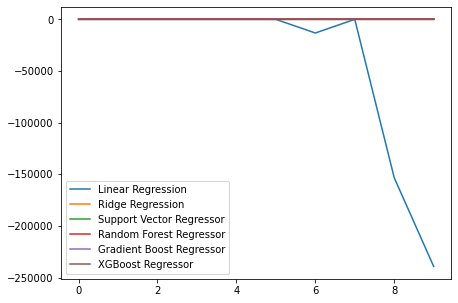

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))

for model in models:
    ax.plot(models.get(model), label = model)
plt.legend()
plt.show()

In [13]:
for model in models:
    models[model] = models[model].mean()
models

{'Linear Regression': -40577.105600668976,
 'Ridge Regression': 0.8368682589754961,
 'Support Vector Regressor': -0.053795480888864565,
 'Random Forest Regressor': 0.6694692582991806,
 'Gradient Boost Regressor': 0.8916392993959974,
 'XGBoost Regressor': 0.8726863916076827}

Hence we choose Gradient Boost Regressor and XGBoost

### Hyperparameter Tuning

#### Gradient Boost

In [129]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'n_estimators': [100, 300, 500],
    'max_depth': [2, 3],
    'max_features':[None, 2, 4, 6],
    'ccp_alpha' :[0.0, 0.2, 0.6]
}

In [130]:
Rboost_grid = RandomizedSearchCV(GbR, parameters,
                          scoring = 'r2',
                          return_train_score = True, cv = 3, n_jobs = -1)
Rboost_grid.fit(df_train, target.values.reshape(len(target),))

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.2, 0.6],
                                        'learning_rate': [0.1, 0.3, 0.5, 0.7],
                                        'max_depth': [2, 3],
                                        'max_features': [None, 2, 4, 6],
                                        'n_estimators': [100, 300, 500]},
                   return_train_score=True, scoring='r2')

In [131]:
Rboost_grid.best_params_

{'n_estimators': 300,
 'max_features': None,
 'max_depth': 2,
 'learning_rate': 0.7,
 'ccp_alpha': 0.0}

In [31]:
model_0 = {'n_estimators': 300,
 'max_features': 2,
 'max_depth': 3,
 'learning_rate': 1.2915496650148839,
 'ccp_alpha': 5.994842503189409}

model_1 = {'n_estimators': 300,
 'max_features': None,
 'max_depth': 3,
 'learning_rate': 1.0}

model_2 = {'n_estimators': 700,
 'max_features': 6,
 'max_depth': 5,
 'learning_rate': 1.0,
 'ccp_alpha': 5.994842503189409}

model_3 = {'n_estimators': 1000,
 'max_features': 8,
 'max_depth': 2,
 'learning_rate': 1.2915496650148839,
 'ccp_alpha': 2.7825594022071245}

model_4 = {}

model_5 {'n_estimators': 300,
 'max_features': None,
 'max_depth': 2,
 'learning_rate': 0.7,
 'ccp_alpha': 0.0}

In [70]:
from sklearn.model_selection import KFold
final_models_train_GB = {}
GbR_model_0 = GradientBoostingRegressor(n_estimators = 300, max_features = 2,
                                          max_depth = 3, learning_rate = 1.2915496650148839,
                                          ccp_alpha = 5.994842503189409, random_state = 0)
model_0 = cross_val_score(GbR_model_0, df_train, target.values.reshape(len(target),), cv = 10)
final_models_train_GB['Model 0'] = model_0

In [71]:
GbR_model_1 = GradientBoostingRegressor(n_estimators = 300, max_features = None,
                                          max_depth = 3, learning_rate = 1.0,
                                          ccp_alpha = 0.0, random_state = 0)
model_1 = cross_val_score(GbR_model_1, df_train, target.values.reshape(len(target),), cv = 10)
final_models_train_GB['Model 1'] = model_1

In [72]:
GbR_model_2 = GradientBoostingRegressor(n_estimators = 700, max_features = 6,
                                          max_depth = 5, learning_rate = 1.0,
                                          ccp_alpha = 5.994842503189409, random_state = 0)
model_2 = cross_val_score(GbR_model_2, df_train, target.values.reshape(len(target),), cv = 10)
final_models_train_GB['Model 2'] = model_2

In [73]:
GbR_model_3 = GradientBoostingRegressor(n_estimators = 1000, max_features = 8,
                                          max_depth = 2, learning_rate = 1.2915496650148839,
                                          ccp_alpha = 2.7825594022071245, random_state = 0)
model_3 = cross_val_score(GbR_model_3, df_train, target.values.reshape(len(target),), cv = 10)
final_models_train_GB['Model 3'] = model_3

In [74]:
GbR_model_4 = GradientBoostingRegressor()
model_4= cross_val_score(GbR_model_4, df_train, target.values.reshape(len(target),), cv = 10)
final_models_train_GB['Model 4'] = model_4

In [132]:
GbR_model_5 = GradientBoostingRegressor(n_estimators = 300, max_features = None,
                                        max_depth = 2, learning_rate = 0.7, ccp_alpha = 0.0)

model_5= cross_val_score(GbR_model_5, df_train, target.values.reshape(len(target),), cv = 10)
final_models_train_GB['Model 5'] = model_5

In [133]:
final_models_train_GB

{'Model 0': array([ 0.23131665,  0.20901187, -0.05132772, -0.25401465,  0.45210941,
         0.24231073,  0.25558322,  0.18238004,  0.36654652,  0.11268855]),
 'Model 1': array([0.82351985, 0.78113949, 0.83330928, 0.73554826, 0.85549077,
        0.78524073, 0.79913495, 0.8354165 , 0.83555387, 0.72633753]),
 'Model 2': array([0.69533636, 0.67872333, 0.57026334, 0.52924404, 0.62477719,
        0.48390029, 0.70924497, 0.43283743, 0.73565327, 0.57867759]),
 'Model 3': array([0.43552853, 0.58066508, 0.57156059, 0.58285842, 0.68887401,
        0.62524714, 0.73767843, 0.69447087, 0.69402972, 0.26898812]),
 'Model 4': array([0.90944294, 0.90810307, 0.93352136, 0.79540257, 0.90100116,
        0.88985431, 0.87245488, 0.89790798, 0.90325737, 0.88089727]),
 'Model 5': array([0.80059719, 0.88944823, 0.84954585, 0.81526249, 0.90441821,
        0.86247   , 0.83809452, 0.89007145, 0.90033055, 0.82944118])}

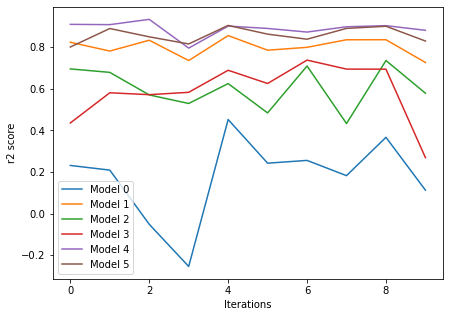

In [134]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))

for model in final_models_train_GB:
    ax.plot(final_models_train_GB.get(model), label = model)

plt.xlabel("Iterations")
plt.ylabel("r2 score")
plt.legend()
plt.show()

In [135]:
final_models_train_GB_bar = {}
for model in final_models_train_GB:
    final_models_train_GB_bar[model] = final_models_train_GB[model].mean()
final_models_train_GB_bar

{'Model 0': 0.1746604619802175,
 'Model 1': 0.8010691237136458,
 'Model 2': 0.6038657802756465,
 'Model 3': 0.5879900912953367,
 'Model 4': 0.8891842913815828,
 'Model 5': 0.8579679684911106}

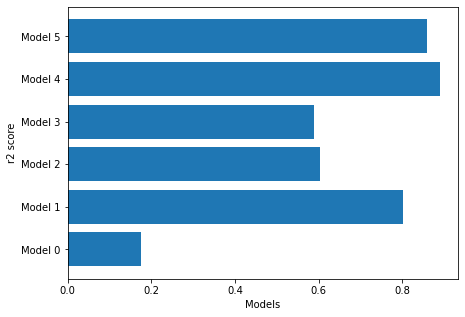

In [136]:
ax, fig = plt.subplots(1, 1, figsize = (7, 5))
plt.barh(range(len(final_models_train_GB_bar)), 
         final_models_train_GB_bar.values(),
         tick_label = [*final_models_train_GB_bar],
         align='center')
plt.ylabel("r2 score")
plt.xlabel("Models")
plt.show()

#### XGBoost

In [126]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 500, 900],
}

In [127]:
XGBR = XGBRegressor(random_state = 0)
XGboost_grid = GridSearchCV(XGBR, parameters,
                          scoring = 'r2',
                          return_train_score = True, cv = 3, n_jobs = -1)
XGboost_grid.fit(df_train, target)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=0,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [128]:
XGboost_grid.best_params_

{'n_estimators': 100}